In [1]:
#import sksurv
from sksurv.datasets import load_gbsg2
import numpy as np
import pandas as pd
from survONS import surv_ons, survive, hazard

x, y = load_gbsg2()
df = pd.DataFrame(y)
df.head(10)

def cancer_levels(val):
    if val == "I":
        return 1
    elif val == "II":
        return 2
    elif val == "III":
        return 3
    else:
        return 0
x["horTh"] = x["horTh"].cat.codes
x["menostat"] = x["menostat"].apply(lambda val: 0 if (val == "Pre") else 1)
x["tgrade"] = x["tgrade"].apply(lambda val: cancer_levels(val))
x.head()

,age,estrec,horTh,menostat,pnodes,progrec,tgrade,tsize
0,70.0,66.0,0,1,3.0,48.0,2,21.0
1,56.0,77.0,1,1,7.0,61.0,2,12.0
2,58.0,271.0,1,1,9.0,52.0,2,35.0
3,59.0,29.0,1,1,4.0,60.0,2,17.0
4,73.0,65.0,0,1,1.0,26.0,2,35.0


In [2]:

# Simulación sin dataset
N2 = 1000
n_it2 = 500
max_T = 1000
d2 = 4
eta2 = np.zeros((3,))
sigma2 = np.eye(3,3)
gamma2 = np.arange(np.log(1/n_it2), np.log(50), 1.2)
gamma2 = np.exp(gamma2)
K2 = len(gamma2)

M2 = 1
beta_real2 = np.zeros((d2, M2))
grid_bound2 = np.zeros((M2, 1))
beta_surv2 = np.zeros((n_it2,d2,M2))
like_surv2 = np.zeros((n_it2, M2))
gamma_t2 = np.zeros((n_it2, M2))

for i in range(M2):
    beta_real2[: , i] = np.random.normal(loc=0, scale=1, size=d2)
    D2 = 1.1 * np.sqrt(np.dot(beta_real2[:, i].T, beta_real2[:, i]))
    epsilon = 1/(gamma2*D2) ** 2
        
    X2 = np.random.multivariate_normal(eta2, sigma2, N2)
    X2_1 = np.column_stack((np.ones(N2), X2))
        
    arrival_time = np.array([0 for i in range(0, N2)]) #np.random.uniform(0, max_T, N2)
    random_time = lambda x: x + (max_T - x) * np.random.rand()
    time_indiv = np.array([random_time(xi) for xi in arrival_time])
    censor_indiv = np.array([random_time(xi) for xi in arrival_time])
    # time_indiv  = arrival_time + np.array([np.random.exponential(
    #     1 / np.exp(np.dot(beta_real2[:, i].T, X2_1[j, ])))
    #      for j in range(N2)])
    # censor_indiv = arrival_time + np.array([np.random.exponential(
    #     1 / np.exp(np.dot(beta_real2[:, i].T, X2_1[j, ])))
    #      for j in range(N2)])
    u2 = np.array([min(time_indiv[i], censor_indiv[i]) for i in range(N2)])
    delta = time_indiv < censor_indiv
        
    R2 = [[] for _ in range(n_it2)]

    for t in range(0, n_it2):
        R2[t].append(0)
    for j in range(1, N2):
        t1 = max(1,int(np.floor(arrival_time[j])-1)) # tiempo en el que i entra al estudio
        t2 = min(n_it2,int(np.floor(u2[j])+1)) # tiempo en el que i sale del estudio
        for t in range(t1, t2):
            R2[t].append(j)

    surv = surv_ons(arrival_time, u2, delta, X2_1, D2, gamma2, n_it2, epsilon, R2)
    #print(surv)
    beta_surv2[:,:,i] = surv["beta_boa_arr"]
    print(beta_surv2[:,:,i])
    G2 = max([np.sqrt(np.matmul(surv["grad_boa"][j].T, surv["grad_boa"][j])) for j in range(n_it2)])
    print(G2)
    grid_bound2[i] = 1/(4*G2*D2)
    print(grid_bound2[i])
    gamma_t2[:,i] = surv["gamma_temp"].flatten()
    like_surv2[:, i] = surv["lik_boa"].flatten()


iteracion 1
iteracion 2
iteracion 3
iteracion 4
iteracion 5
iteracion 6
iteracion 7
iteracion 8
iteracion 9
iteracion 10
iteracion 11
iteracion 12
iteracion 13
iteracion 14
iteracion 15
iteracion 16
iteracion 17
iteracion 18
iteracion 19
iteracion 20
iteracion 21
iteracion 22
iteracion 23
iteracion 24
iteracion 25
iteracion 26
iteracion 27
iteracion 28
iteracion 29
iteracion 30
iteracion 31
iteracion 32
iteracion 33
iteracion 34
iteracion 35
iteracion 36
iteracion 37
iteracion 38
iteracion 39
iteracion 40
iteracion 41
iteracion 42
iteracion 43
iteracion 44
iteracion 45
iteracion 46
iteracion 47
iteracion 48
iteracion 49
iteracion 50
iteracion 51
iteracion 52
iteracion 53
iteracion 54
iteracion 55
iteracion 56
iteracion 57
iteracion 58
iteracion 59
iteracion 60
iteracion 61
iteracion 62
iteracion 63
iteracion 64
iteracion 65
iteracion 66
iteracion 67
iteracion 68
iteracion 69
iteracion 70
iteracion 71
iteracion 72
iteracion 73
iteracion 74
iteracion 75
iteracion 76
iteracion 77
iteracio

IndexError: index 999 is out of bounds for axis 2 with size 1

[[-0.2735869 ]
 [-0.25545396]
 [ 0.00078727]
 [-0.11297947]]


Text(0, 0.5, 'Probabilidad de supervivencia')

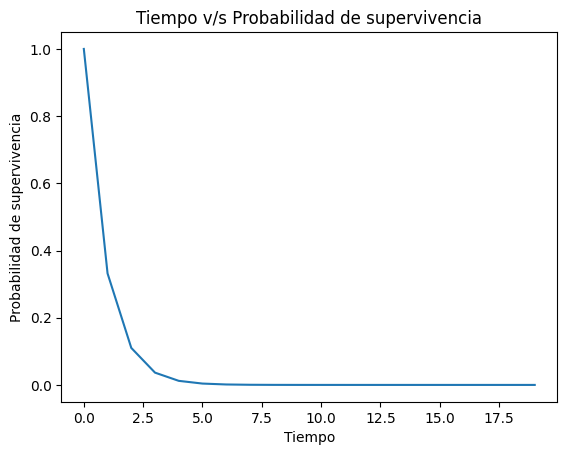

In [28]:
#beta_surv_mean = np.zeros((n_it2, d2))
beta_surv_mean = np.mean(beta_surv2, axis = 0)
print(beta_surv_mean)

# for t in range(0, 200):
#     print(survive(X2_1[500], beta_surv_mean, t, arrival_time[500]))
survival = [survive(X2_1[500], beta_surv_mean, t, arrival_time[500]) for t in range(20)]

import matplotlib.pyplot as plt

plt.plot([i for i in range(20)], survival)
plt.title("Tiempo v/s Probabilidad de supervivencia")
plt.xlabel("Tiempo")
plt.ylabel("Probabilidad de supervivencia")


In [8]:
#import sksurv
# from sksurv.datasets import load_gbsg2
# from survONS import surv_ons

# x, y = load_gbsg2()

In [3]:
N = x.shape[0]  #Número de individuosid
n_it = 200
max_t = df["time"].max()
d = x.shape[1]

eta = np.zeros((3,1))
sigma = np.eye(3,3)

gamma = np.arange(np.log(1/n_it), np.log(50), 1.2)
gamma = np.exp(gamma)

K = len(gamma)
M = 5

beta_real = np.zeros((d, M))
grid_bound = np.zeros((M, 1))

beta_surv = np.zeros((n_it,d,M))

like_surv = np.zeros((n_it, M))

gamma_t = np.zeros((n_it, M))

X = x.to_numpy()
t0 = np.zeros(N)
u = y["time"]
delta = y["cens"]
# sqrt(crossprod(beta_real[,m]))[1,]
D = 2.5
n = n_it
epsilon = 1/(gamma*D) ** 2
R = [[] for _ in range(n_it)]

for t in range(0, n_it):
    R[t].append(0)
for i in range(1, N):
    t1 = max(1,int(np.floor(0)-1)) # tiempo en el que i entra al estudio
    t2 = min(n_it,int(np.floor(u[i])+1)) # tiempo en el que i sale del estudio
    for t in range(t1, t2):
        R[t].append(i)
        
survons = surv_ons(t0, u, delta, X, D, gamma, n, epsilon, R)
beta_surv[:,:,0] = survons["beta_boa_arr"]
print(beta_surv[:,:,0])
G = max([np.sqrt(np.matmul(survons["grad_boa"][j].T, survons["grad_boa"][j])) for j in range(n_it)])
print(G)
grid_bound[0] = 1/(4*G*D)
print(grid_bound[0])
gamma_t[:,0] = survons["gamma_temp"].flatten()
like_surv[:, 0] = survons["lik_boa"].flatten()
#beta_surv_mean = np.zeros((n_it2, d2))

beta_surv_mean = np.mean(beta_surv, axis = 0)
print(beta_surv_mean)

# for t in range(0, 200):
#     print(survive(X2_1[500], beta_surv_mean, t, arrival_time[500]))
survival = [survive(X[500], beta_surv_mean, t, 0) for t in range(20)]

import matplotlib.pyplot as plt

plt.plot([i for i in range(20)], survival)
plt.title("Tiempo v/s Probabilidad de supervivencia")
plt.xlabel("Tiempo")
plt.ylabel("Probabilidad de supervivencia")


iteracion 1
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,)
xi_shape (8,)
exp (1,)
a (8,


KeyboardInterrupt

